<a href="https://colab.research.google.com/github/KudakwasheMurungweni/FreshProducePricePrediction/blob/main/Tomato_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import csv 
drive.mount('/content/drive', force_remount=True)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics


Mounted at /content/drive


In [ ]:
filename = r'/content/drive/MyDrive/Datasets/new_dataset.csv'
tomatoes = pd.read_csv(filename)


In [ ]:
tomatoes.head()

,TomatoType,Season,Month,EnergyProblems,Quantity,InsectsDiseases,Weekday,Size,Ripeness,Price
0,Trinity,Summer,January,1,L,N,1,Big,G,0.83
1,Trinity,Summer,January,0,L,Y,0,Small,B,0.45
2,Trinity,Winter,May,1,M,N,1,Mid,T,0.91
3,Star9,Summer,March,0,L,Y,0,Mid,P,0.57
4,Star6,Winter,July,1,S,N,1,Mid,R,1.06


In [ ]:
tomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TomatoType       107 non-null    object 
 1   Season           107 non-null    object 
 2   Month            107 non-null    object 
 3   EnergyProblems   107 non-null    int64  
 4   Quantity         107 non-null    object 
 5   InsectsDiseases  107 non-null    object 
 6   Weekday          107 non-null    int64  
 7   Size             107 non-null    object 
 8   Ripeness         107 non-null    object 
 9   Price            107 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 8.5+ KB


In [ ]:
tomatoes.describe()

,EnergyProblems,Weekday,Price
count,107.000000,107.000000,107.000000
mean,0.588785,0.598131,0.836075
std,0.494370,0.492583,0.365593
min,0.000000,0.000000,0.290000
25%,0.000000,0.000000,0.570000
50%,1.000000,1.000000,0.780000
75%,1.000000,1.000000,1.125000
max,1.000000,1.000000,1.800000


ONE HOT ENCODING

In [ ]:
tomatoes.replace({'TomatoType':{'Trinity':0,'Star9':1,'Star6':2,'RomaVF':3,'Daisy':4, 'Supersweet':5}},inplace=True)
tomatoes.replace({'Month':{'January':0,'February':1,'March':2,'April':3,'May':4, 'June':5,'July':6,'August':7,'September':8,'October':9,'November':10, 'December':11}},inplace=True)
tomatoes.replace({'Season':{'Summer':0,'Winter':1,'CNG':2}},inplace=True)
tomatoes.replace({'Quantity':{'L':0,'M':1,'S':2}},inplace=True)
tomatoes.replace({'Size':{'Small':0,'Mid':1,'Big':2}},inplace=True)
tomatoes.replace({'Ripeness':{'G':0,'B':1,'T':2,'P':3,'R':4}},inplace=True)
tomatoes.replace({'InsectsDiseases':{'Y':1,'N':0}},inplace=True)

SPLITTING THE DATA AND TARGET

In [ ]:
X = tomatoes.drop(['Price'],axis=1)
Y = tomatoes['Price']

SPLITTING THE DATA FOR TRAINING AND TESTING

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

MODEL TRAINING

Linear Regression


In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7989633247777547


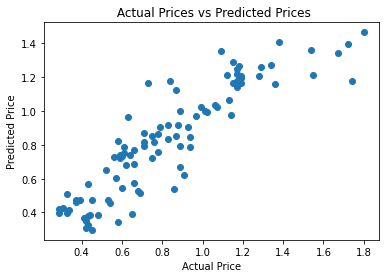

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
dec_tree_model = DecisionTreeRegressor()

In [ ]:
dec_tree_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
dec_data_prediction = dec_tree_model.predict(X_train)

In [ ]:
error_score_dec = metrics.r2_score(Y_train, dec_data_prediction)
print("R squared error : ", error_score_dec)

R squared error :  1.0


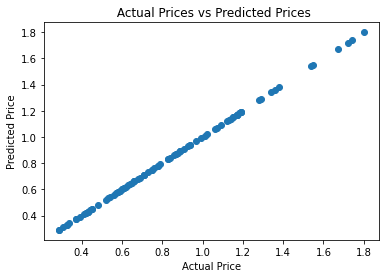

In [ ]:
plt.scatter(Y_train, dec_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Random Forest

In [ ]:
ran_forest_model = RandomForestRegressor()

In [ ]:
ran_forest_model.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
ran_data_prediction =ran_forest_model.predict(X_train)

In [ ]:
error_score_ran = metrics.r2_score(Y_train, ran_data_prediction)
print("R squared error : ", error_score_ran)

R squared error :  0.9578967582368957


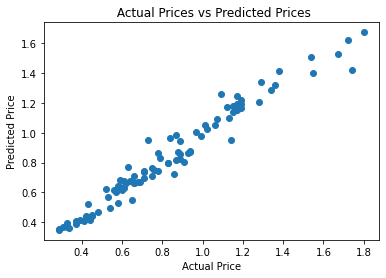

In [ ]:
plt.scatter(Y_train, ran_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

KNN Nearest Neighbour


In [ ]:
knn_model = KNeighborsRegressor()

In [ ]:
knn_model.fit(X_train,Y_train)

KNeighborsRegressor()

In [ ]:
knn_data_prediction = knn_model.predict(X_train)

In [ ]:
error_score_knn = metrics.r2_score(Y_train, knn_data_prediction)
print("R squared error : ", error_score_knn)

R squared error :  0.761811697448291


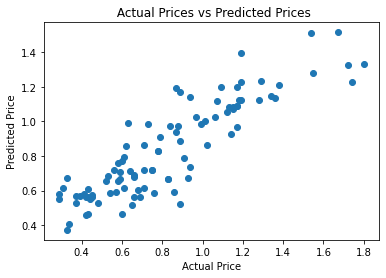

In [ ]:
plt.scatter(Y_train, knn_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

MLP Regressor

In [ ]:
mlp_model = MLPRegressor()

In [ ]:
mlp_model.fit(X_train,Y_train)

MLPRegressor()

In [ ]:
mlp_data_prediction = mlp_model.predict(X_train)

In [ ]:
error_score_mlp = metrics.r2_score(Y_train, mlp_data_prediction)
print("R squared error : ", error_score_mlp)

R squared error :  0.8584754999751284


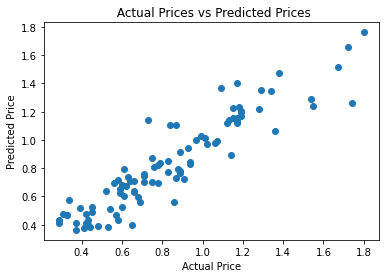

In [ ]:
plt.scatter(Y_train, mlp_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Gradient Boosting Regressor Algorithm

In [ ]:
gbr_model = GradientBoostingRegressor()

In [ ]:
gbr_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [ ]:
gbr_data_prediction = gbr_model.predict(X_train)

In [ ]:
error_score_gbr = metrics.r2_score(Y_train, gbr_data_prediction)
print("R squared error : ", error_score_gbr)

R squared error :  0.9641705991533025


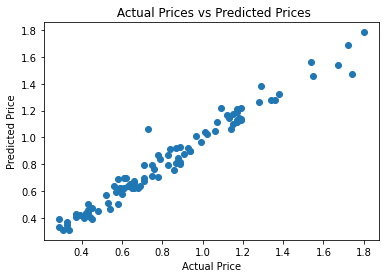

In [ ]:
plt.scatter(Y_train, gbr_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()